In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [2]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir = '/opt/ml/input/data/train'

In [3]:
csv_path = os.path.join(train_dir, 'train.csv')
csv = pd.read_csv(csv_path)
image_dir = os.path.join(train_dir, 'images')
pathlist = csv['path'].tolist()
def parser(x):
    s = x.split('_')
    return [s[1], s[3]]
data = list(map(parser, pathlist))
df = pd.DataFrame(data)
df

,0,1
0,female,45
1,female,52
2,male,54
3,female,58
4,female,59
...,...,...
2695,male,19
2696,male,19
2697,male,19
2698,male,20


In [4]:
df.columns = ['Sex', 'Age']
df['Age'] = df['Age'].astype(int)

In [5]:
df['Age'].value_counts().sort_index()

18    192
19    407
20    267
21     41
22     58
23     72
24     62
25     82
26     44
27     15
28     25
29     16
30     17
31      3
32      7
33      5
34     13
35     19
36      8
37      3
38     14
39      6
40     20
41      7
42     13
43     18
44     13
45     27
46     14
47     10
48     39
49     31
50     80
51     63
52     78
53     64
54     82
55    100
56    123
57    106
58    159
59     85
60    192
Name: Age, dtype: int64

In [6]:
def age_categorize(age):
    if age < 30:
        return 0
    elif age < 58:
        return 1
    else:
        return 2
df['Age'] = df['Age'].apply(age_categorize)

In [7]:
df.sample(10)

,Sex,Age
2379,female,0
2347,male,0
269,female,1
1535,male,1
1765,male,2
381,female,0
329,female,1
429,female,2
891,male,0
192,male,1


In [8]:
female = df[df['Sex'] == 'female']
female.value_counts()

Sex     Age
female  0      726
        1      669
        2      257
dtype: int64

In [9]:
male = df[df['Sex'] == 'male']
male.value_counts()

Sex   Age
male  0      555
      1      314
      2      179
dtype: int64

In [10]:
sex = df.groupby('Sex').count()
age = df.groupby('Age').count()
sex

,Age
Sex,
female,1652
male,1048


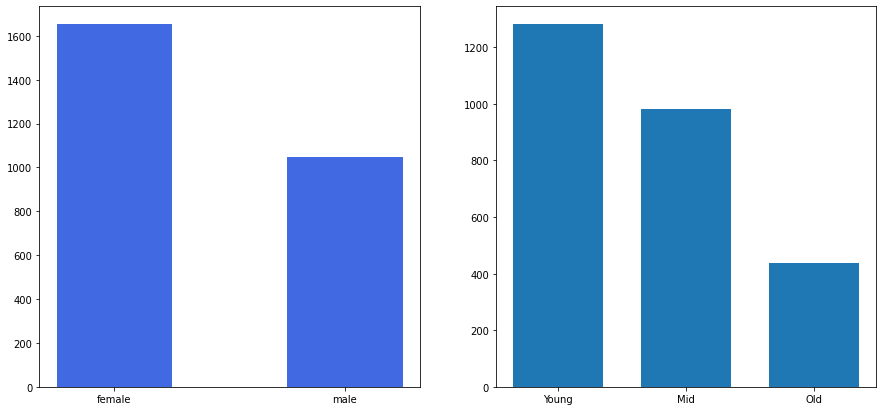

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].bar(sex.index, sex['Age'], width=0.5, color='royalblue')
axes[1].bar(['Young', 'Mid', 'Old'], age['Sex'], width=0.7)
plt.show()

In [12]:
age

,Sex
Age,
0,1281
1,983
2,436
